In [1]:
import numpy as np

In [2]:
import pickle
import os
file = os.path.join('extraction_svm.pkl')
with open(file, 'rb') as fichier : extraction_svm = pickle.load(fichier, encoding='latin1')

In [3]:
grid = extraction_svm['grid']
y_train0 = extraction_svm['y_train']
y_test0 = extraction_svm['y_test']
y_pred0 = extraction_svm['y_pred']
X_test0 = extraction_svm['X_test']
X_train0 = extraction_svm['X_train']
var = extraction_svm['var']

In [4]:
print(grid.best_params_, '-->', grid.best_score_)

{'C': 0.23378038720396177, 'gamma': 0.38233342215886723, 'kernel': 'rbf'} --> 0.8359167321876522


In [5]:
X_train, y_train = X_train0[:, :-1], y_train0
X_test, y_test = X_test0[:, :-1], y_test0

print(X_test0.shape, X_test.shape)

(2160, 16) (2160, 15)


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

size_c = 32
C_range = np.logspace(-5, 10., size_c, base=2.)

param_grid = [{'kernel': ['linear'], 'C': C_range}]


grid = GridSearchCV(SVC(verbose=False, tol=1e-3, max_iter = -1, class_weight='balanced', probability=True),
                    param_grid, verbose=0, scoring='balanced_accuracy', n_jobs=1,) #cv=50, n_jobs=-1

In [7]:
X_train_ = np.zeros((len(X_train), 0))
X_train_ = np.hstack((X_train_, X_train))
grid.fit(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': array([3.12500e-02, 4.37028e-02, 6.11180e-02, 8.54730e-02, 1.19533e-01,
       1.67166e-01, 2.33780e-01, 3.26940e-01, 4.57222e-01, 6.39421e-01,
       8.94225e-01, 1.25057e+00, 1.74890e+00, 2.44583e+00, 3.42047e+00,
       4.78349e+00, 6.68967e+00, 9.35545e+00...1.36881e+02, 1.91426e+02, 2.67708e+02, 3.74387e+02, 5.23577e+02,
       7.32218e+02, 1.02400e+03])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='balanced_accuracy', verbose=0)

In [8]:
print(grid.best_params_, '-->', grid.best_score_)

{'C': 0.043702843700726655, 'kernel': 'linear'} --> 0.7932419783593545


In [9]:
from sklearn.feature_selection import RFE

svc = SVC(C=grid.best_params_['C'], kernel=grid.best_params_['kernel'])

rfe = RFE(estimator=svc, n_features_to_select=1)
rfe.fit(X_train, y_train.ravel())
ranking = rfe.ranking_

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

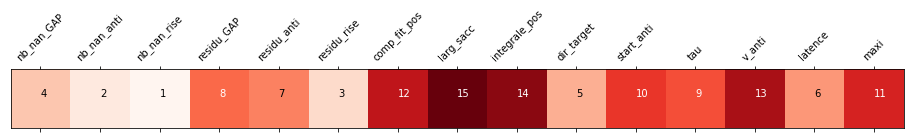

In [11]:
plt.matshow(ranking.reshape((1,15)), cmap=plt.cm.Reds)
for x in range(len(ranking)) :
    plt.text(x, -0.045, ranking[x], color="white" if ranking[x] > np.max(ranking)/2 else "black")
plt.xticks(range(len(var)), var, rotation=45)
plt.yticks([]);